In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [96]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Carregar o dataset
caminho = '/content/drive/MyDrive/dataset/winequality-white.csv'
data_wine = pd.read_csv(caminho)

In [98]:
data_wine = data_wine[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']]


In [99]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alcohol           4905 non-null   float64
 1   volatile acidity  4900 non-null   float64
 2   sulphates         4905 non-null   float64
 3   citric acid       4904 non-null   float64
 4   quality           4905 non-null   float64
dtypes: float64(5)
memory usage: 191.8 KB


In [100]:
data_wine.head(10)

,alcohol,volatile acidity,sulphates,citric acid,quality
0,8.8,0.27,0.45,0.36,6.0
1,9.5,0.30,0.49,0.34,6.0
2,10.1,0.28,0.44,0.40,6.0
3,9.9,0.23,0.40,0.32,6.0
4,9.9,0.23,0.40,0.32,6.0
5,10.1,0.28,0.44,0.40,6.0
6,9.6,0.32,0.47,0.16,6.0
7,8.8,0.27,0.45,0.36,6.0
8,9.5,0.30,0.49,0.34,6.0
9,11.0,0.22,0.45,0.43,6.0


In [101]:
data_wine.describe()

,alcohol,volatile acidity,sulphates,citric acid,quality
count,4905.000000,4900.000000,4905.000000,4904.000000,4905.000000
mean,10.514634,0.278173,0.489713,0.334203,5.877676
std,1.230146,0.100792,0.114153,0.120959,0.885192
min,8.000000,0.080000,0.220000,0.000000,3.000000
25%,9.500000,0.210000,0.410000,0.270000,5.000000
50%,10.400000,0.260000,0.470000,0.320000,6.000000
75%,11.400000,0.320000,0.550000,0.390000,6.000000
max,14.200000,1.100000,1.080000,1.660000,9.000000


In [102]:
data_wine.isna().sum()

,0
alcohol,3
volatile acidity,8
sulphates,3
citric acid,4
quality,3


In [103]:
print(data_wine[data_wine.duplicated()])

      alcohol  volatile acidity  sulphates  citric acid  quality
4         9.9              0.23       0.40         0.32      6.0
5        10.1              0.28       0.44         0.40      6.0
7         8.8              0.27       0.45         0.36      6.0
8         9.5              0.30       0.49         0.34      6.0
20       12.8              0.66       0.39         0.48      8.0
...       ...               ...        ...          ...      ...
4902     10.8              0.20       0.35         0.26      6.0
4903     10.8              0.20       0.35         0.26      6.0
4904     10.8              0.20       0.35         0.26      6.0
4906      NaN               NaN        NaN          NaN      NaN
4907      NaN               NaN        NaN          NaN      NaN

[979 rows x 5 columns]


In [104]:
# Lista das colunas que precisam ser convertidas
colunas_convertidas = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'alcohol']

# Converte para numérico, forçando erros para NaN
for coluna in colunas_convertidas:
    data_wine[coluna] = pd.to_numeric(data_wine[coluna], errors='coerce')


In [105]:
imputer = SimpleImputer(strategy='mean')
data_wine[colunas_convertidas] = imputer.fit_transform(data_wine[colunas_convertidas])

In [106]:
df_long = data_wine[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']].melt(var_name='variable', value_name='value')

In [107]:
print(df_long['value'].dtype)

float64


In [108]:
scaler = MinMaxScaler()
columns_to_normalize = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
data_wine[columns_to_normalize] = scaler.fit_transform(data_wine[columns_to_normalize])

In [109]:
df_long = data_wine[columns_to_normalize].melt(var_name='variable', value_name='value')

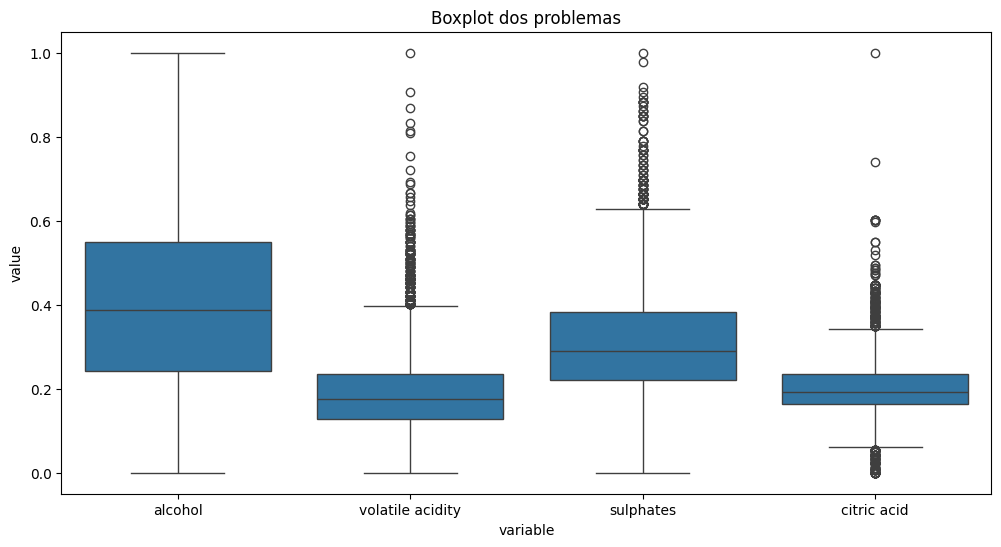

In [110]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_long)
plt.title('Boxplot dos problemas')
plt.show()

In [111]:
# Step 3: Define function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data_wine[(data_wine[column] >= lower) & (data_wine[column] <= upper)]

In [112]:
# Step 4: Remove outliers from selected columns
cols_to_clean = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
for col in cols_to_clean:
    data_wine = remove_outliers(data_wine, col)

In [113]:
quality_counts = data_wine['quality'].value_counts().reset_index()
quality_counts

,quality,count
0,6.0,1993
1,5.0,1236
2,7.0,819
3,8.0,153
4,4.0,108
5,3.0,16
6,9.0,5


In [114]:
imputer = SimpleImputer(strategy='mean')

In [115]:
data_wine.isna().sum()

,0
alcohol,0
volatile acidity,0
sulphates,0
citric acid,0
quality,3


In [116]:
# Tratando dados duplicados
print("Describe antes")
print(data_wine.describe())
data_wine.drop_duplicates(inplace=True)
print("Describe depois da exclusão dos dados duplicados")
print(data_wine.describe())

Describe antes
           alcohol  volatile acidity    sulphates  citric acid      quality
count  4333.000000       4333.000000  4333.000000  4333.000000  4330.000000
mean      0.411178          0.180700     0.303866     0.194934     5.916859
std       0.194432          0.074903     0.115596     0.050884     0.867534
min       0.000000          0.000000     0.000000     0.066265     3.000000
25%       0.241935          0.127451     0.220930     0.162651     5.000000
50%       0.387097          0.176471     0.290698     0.186747     6.000000
75%       0.548387          0.225490     0.372093     0.222892     6.000000
max       1.000000          0.397059     0.627907     0.325301     9.000000
Describe depois da exclusão dos dados duplicados
           alcohol  volatile acidity    sulphates  citric acid      quality
count  3459.000000       3459.000000  3459.000000  3459.000000  3458.000000
mean      0.423888          0.181571     0.304652     0.195996     5.896183
std       0.191834      

In [117]:
data_wine.drop_duplicates(inplace=True)

In [118]:
data_wine.loc[data_wine['alcohol'] > 14.0, 'alcohol'] = data_wine.loc[data_wine['alcohol'] <= 14.0, 'alcohol'].max()

data_wine.loc[data_wine['volatile acidity'] > 0.4, 'volatile acidity'] = data_wine.loc[data_wine['volatile acidity'] <= 0.4, 'volatile acidity'].max()

data_wine.loc[data_wine['sulphates'] > 0.6, 'sulphates'] = data_wine.loc[data_wine['sulphates'] <= 0.6, 'sulphates'].max()

data_wine.loc[data_wine['citric acid'] > 0.55, 'citric acid'] = data_wine.loc[data_wine['citric acid'] <= 0.55, 'citric acid'].max()


In [119]:
X = data_wine.drop('quality', axis=1)
y = data_wine['quality']

In [120]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [121]:
print(pd.Series(y).isnull().sum())

1


In [122]:
mask = y.notnull()
X_clean = X[mask]
y_clean = y[mask]

In [123]:
print(pd.Series(y).isnull().sum())

1


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [125]:
print(pd.DataFrame(X_train).isnull().sum())
print(pd.Series(y_train).isnull().sum())

alcohol             0
volatile acidity    0
sulphates           0
citric acid         0
dtype: int64
0


In [126]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [127]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [128]:
y_pred = model.predict(X_test)

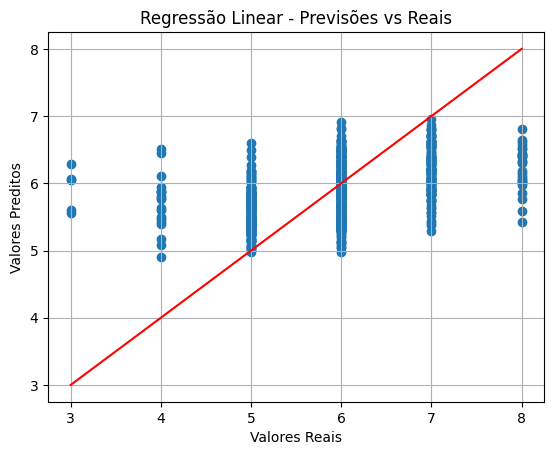

In [129]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Regressão Linear - Previsões vs Reais")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()

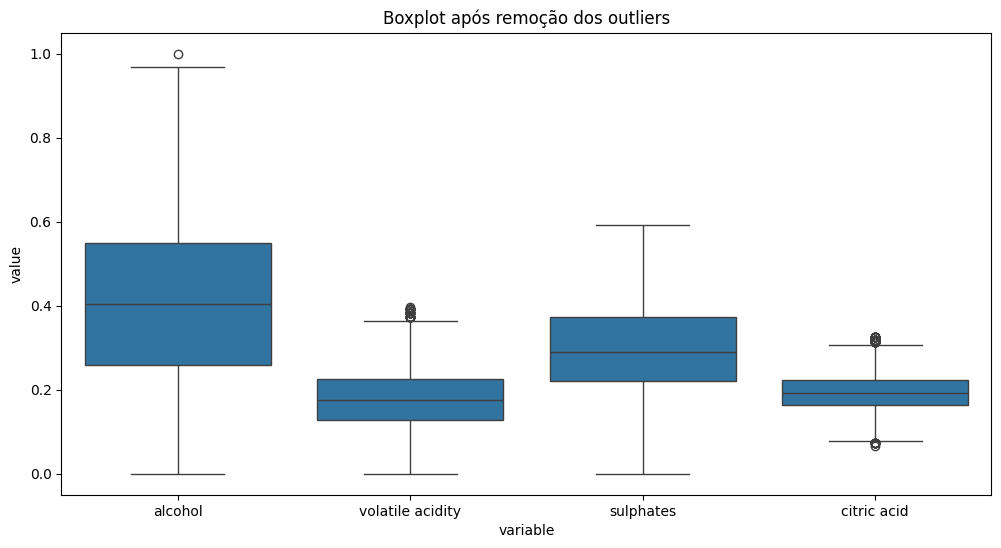

In [130]:
# Step 5: Plot boxplot
df_melted = data_wine[cols_to_clean].melt()
plt.figure(figsize=(12,6))
sns.boxplot(data=df_melted, x='variable', y='value')
plt.title('Boxplot após remoção dos outliers')
plt.show()